Nama: Riofebri Prasetia
NIM: 221911192
Kelas: 3SI1
Mata Kuliah: Data Mining Knowledge Managament
Tugas Akhir Data Mining and Knowledge Management

# **Library yang digunakan dan import data**

In [488]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import neighbors

**Load Data**

Data yang digunakan adalah Data Survei Efek Samping Vaksin COVID-19 pada Staf Rumah Sakit di Rumah Sakit Rujukan Nasional Indonesia. 

In [489]:
#from google.colab import files

#uploaded = files.upload()

In [490]:
#Import data
url = "https://raw.githubusercontent.com/rii92/datmin-tugas-akhir/main/Covid-19%20Rio/1-s2.0-S2352340921003826-mmc1.xlsx%20-%20Sheet1.csv"
header = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22"]
df = pd.read_csv(url)
df.columns = header
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,Male,51-55 years,Medical specialist,Master degree,Downtown,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,None
1,Female,41-45 years,Non medical staff,Master degree,Downtown,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,None
2,Male,56-60 years,Medical doctor,Master degree,Downtown,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,< 24 hours
3,Male,26-30 years,Non medical staff,Bachelor degree,Downtown,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None
4,Female,31-35 years,Medical doctor,Bachelor degree,Downtown,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,< 24 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Male,26-30 years,Medical doctor,Bachelor degree,Downtown,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,24-72 hours
836,Male,26-30 years,Medical doctor,Bachelor degree,Downtown,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,< 24 hours
837,Female,26-30 years,Medical doctor,Bachelor degree,Downtown,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,< 24 hours
838,Female,26-30 years,Medical doctor,Bachelor degree,Downtown,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,24-72 hours


In [491]:
df.keys()

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22'],
      dtype='object')

Berikut merupakan semua kolom yang terkandung dalam tabel. Selanjutnya kita akan melihat info tabel dataset nya terlebih dahulu

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       840 non-null    object
 1   2       840 non-null    object
 2   3       840 non-null    object
 3   4       840 non-null    object
 4   5       840 non-null    object
 5   6       840 non-null    object
 6   7       840 non-null    object
 7   8       840 non-null    object
 8   9       840 non-null    object
 9   10      840 non-null    object
 10  11      840 non-null    object
 11  12      840 non-null    object
 12  13      840 non-null    object
 13  14      840 non-null    object
 14  15      840 non-null    object
 15  16      840 non-null    object
 16  17      840 non-null    object
 17  18      840 non-null    object
 18  19      840 non-null    object
 19  20      840 non-null    object
 20  21      840 non-null    object
 21  22      840 non-null    object
dtypes: object(22)
memory usage

Semua kalam memiliki tipe data 'objek'. Artinya kita perlu melakukan preprocesing untuk mengubah type data agar sesuai dengan yang diperlukan

# **Lakukan Preprocesing**

In [493]:
#untuk data train
# dapatkan beberapa informasi tiap baris
print(df)

# describe the data
df.describe()

          1            2                   3  ...  20  21           22
0      Male  51-55 years  Medical specialist  ...  No  No         None
1    Female  41-45 years   Non medical staff  ...  No  No         None
2      Male  56-60 years      Medical doctor  ...  No  No   < 24 hours
3      Male  26-30 years   Non medical staff  ...  No  No         None
4    Female  31-35 years      Medical doctor  ...  No  No   < 24 hours
..      ...          ...                 ...  ...  ..  ..          ...
835    Male  26-30 years      Medical doctor  ...  No  No  24-72 hours
836    Male  26-30 years      Medical doctor  ...  No  No   < 24 hours
837  Female  26-30 years      Medical doctor  ...  No  No   < 24 hours
838  Female  26-30 years      Medical doctor  ...  No  No  24-72 hours
839    Male  26-30 years      Medical doctor  ...  No  No         None

[840 rows x 22 columns]


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
count,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840
unique,2,10,5,4,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,4
top,Female,26-30 years,Nurse,Bachelor degree,Downtown,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None
freq,570,205,363,632,594,763,823,840,827,654,507,539,774,814,827,829,827,839,837,782,836,374


Cek apakah ada baris yang mengandung null?

In [494]:
#ubah data NaN jadi np.nan
df = df.replace('NaN', np.nan)

df.isna().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

Karena tidak mengandung null maka bisa melanjutkan ke tahap selanjutnya yaitu mengubah tabel menjadi data frame

In [495]:
data = pd.DataFrame(df)

In [547]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for x in data.columns:
  data[x] = le.fit_transform(data[x])

data.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1,6,1,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,3
1,0,4,3,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3
2,1,7,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,2,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1
5,1,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
7,0,7,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
8,0,3,3,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
9,1,6,4,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1


Lakukan pengkodean pada semua kolom. Dikarenakan semua kolom memiliki type data object. Selanjutnya juga akan dilakukan standarisasi

In [548]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_data = pd.DataFrame(scaler.fit_transform(data))

std_data.columns = data.columns


Melakukan Standarisasi/normalisasi data

In [549]:
std_data['22'] = le.fit_transform(std_data['22'])
std_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.452966,1.694514,-1.351381,1.241296,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,1.338170,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,3
1,-0.688247,0.674892,0.093762,1.241296,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,-0.747289,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,3
2,1.452966,2.204325,-2.073953,1.241296,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,-0.747289,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,1
3,1.452966,-0.854540,0.093762,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,-0.810435,-0.747289,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,3
4,-0.688247,-0.344729,-2.073953,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,1.338170,3.424511,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1.452966,-0.854540,-2.073953,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,1.338170,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,0
836,1.452966,-0.854540,-2.073953,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,-0.747289,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,1
837,-0.688247,-0.854540,-2.073953,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,1.875134,1.233905,-0.747289,-0.292013,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,1
838,-0.688247,-0.854540,-2.073953,-0.557994,-0.643538,-0.317675,-0.143722,0.0,-0.125377,-0.533295,1.233905,1.338170,3.424511,-0.178721,-0.125377,-0.115191,-0.125377,-0.034524,-0.059868,-0.272339,-0.069171,0


Mengembalikan atribut '22' ke bentuk pengkodean sebelumnya tanpa ada standarisasi dengan tujuan untuk mempermudah proses klasifikasi. Hal ini dikarenakn label ini merupakan tujuan prediksi dari klasifikasi dalam hal ini.

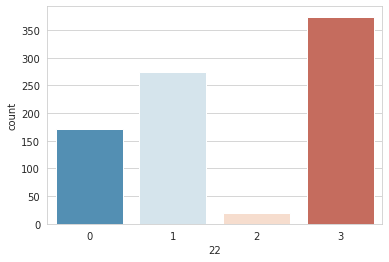

In [550]:
import seaborn as sns

sns.set_style('whitegrid')
sns.countplot(x=std_data['22'],data=std_data,palette='RdBu_r')

Ketika dilakukan pengecekan imbalance bisa dilihat bahwa dalam tabel ini untuk status '22' adalah 2 atau lama gejala 24 sampai 27 jam memiliki imbalance yang ekstrim dan kurang dari 50. Dalam hal ini akan dilakukan hapus baris pada kolom '22' yang bernilai kode 2 karena kurang banyak nya intance untuk dilakukan klasifikasi sehingga mungkin akan mempengaruhi akurasi pada kode yang lain. 

In [551]:
std_data.loc[std_data['22'] == 3, "22"] = 2

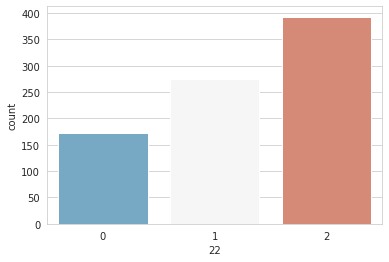

In [552]:
import seaborn as sns

sns.set_style('whitegrid')
sns.countplot(x=std_data['22'],data=std_data,palette='RdBu_r')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


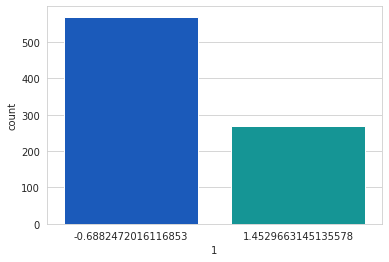

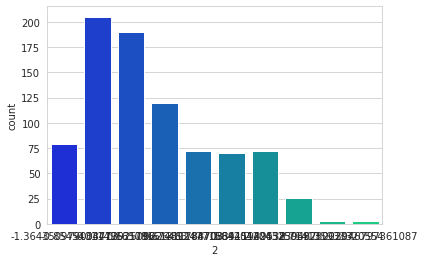

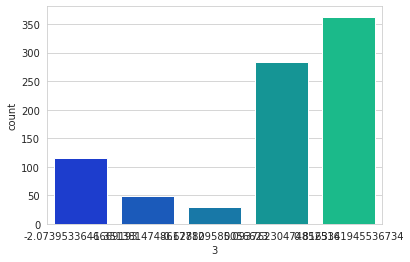

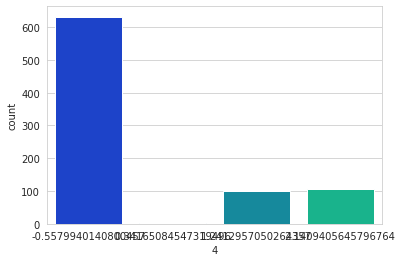

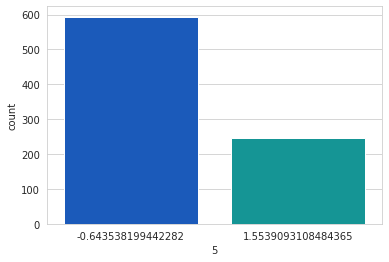

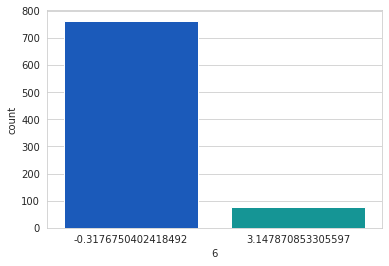

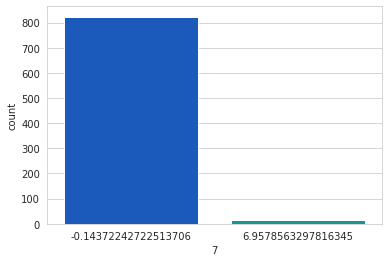

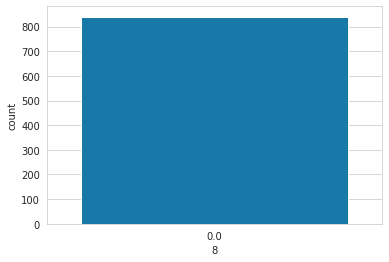

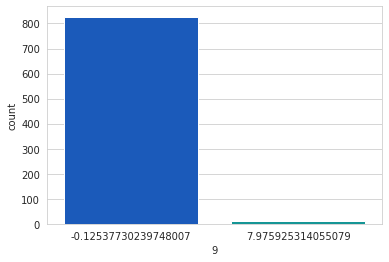

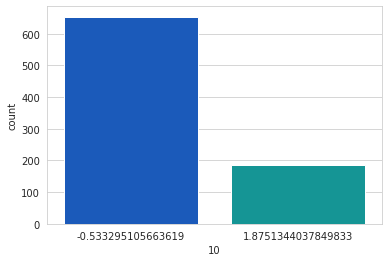

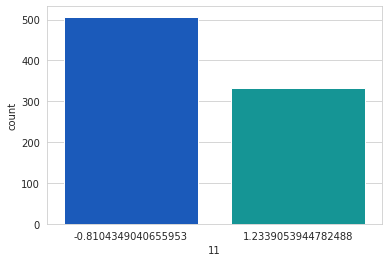

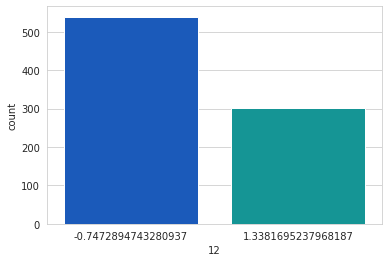

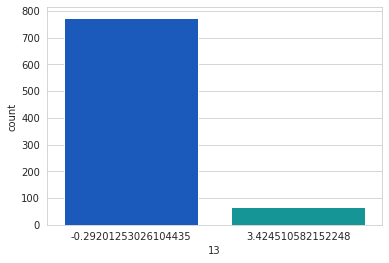

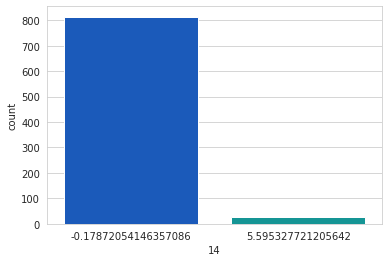

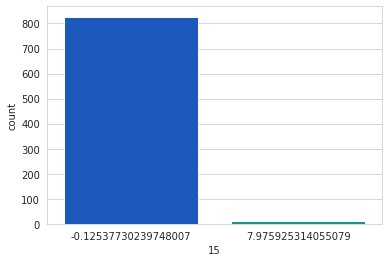

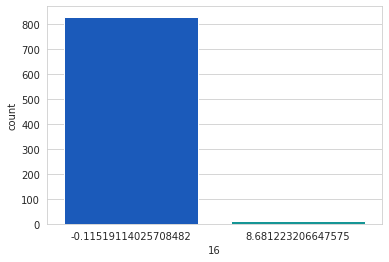

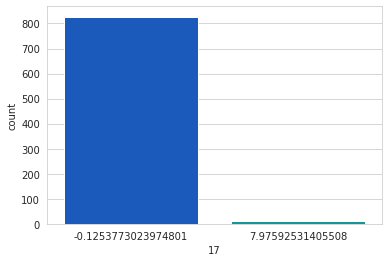

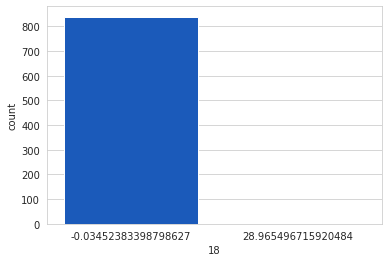

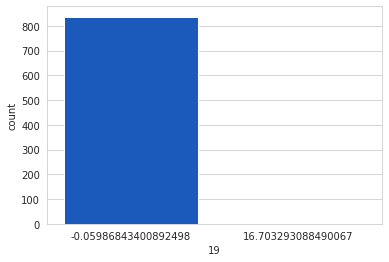

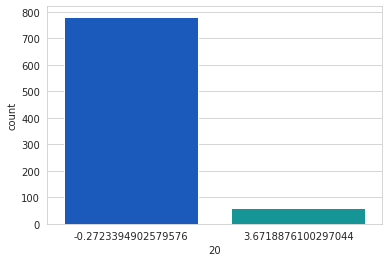

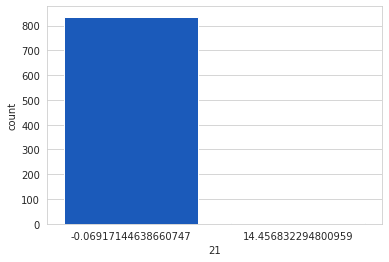

<Figure size 432x288 with 0 Axes>

In [553]:
l=list(std_data.columns[0:22])
for i in range(len(l)-1):
    sns.countplot(x=l[i], data=std_data, palette='winter')
    plt.figure()

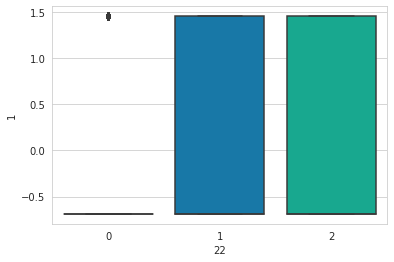

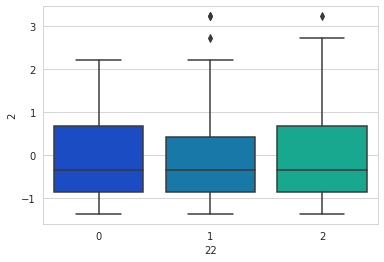

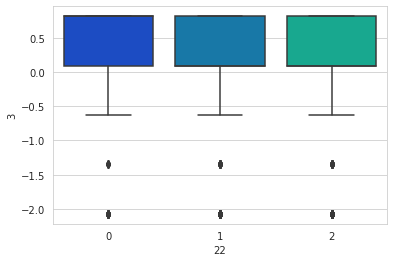

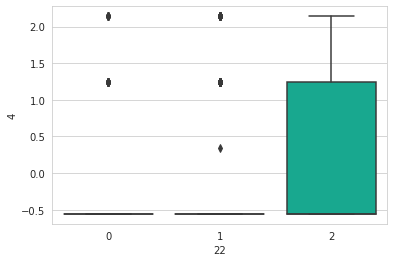

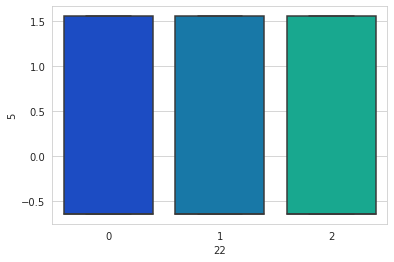

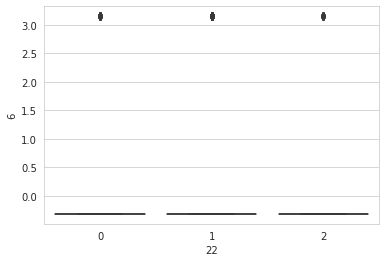

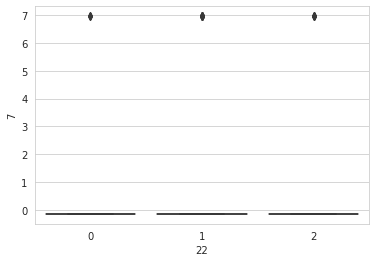

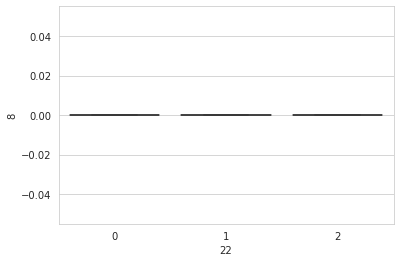

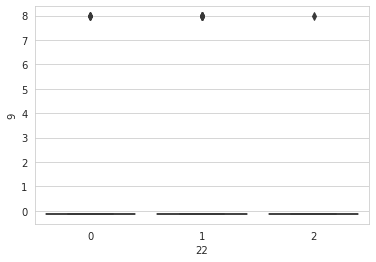

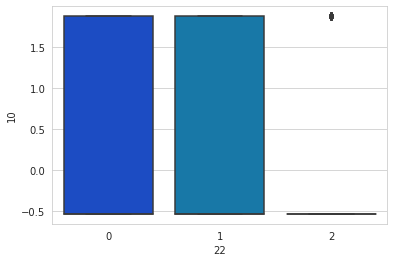

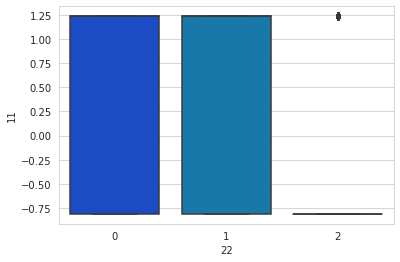

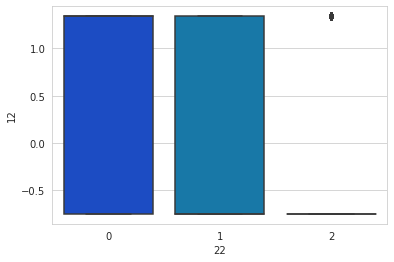

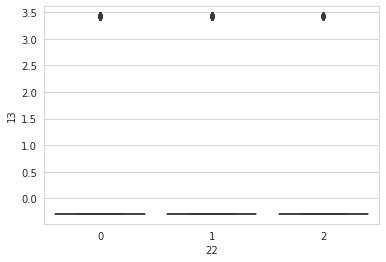

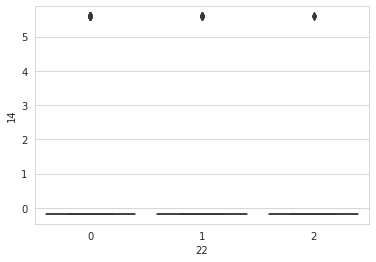

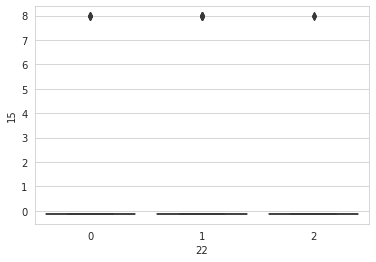

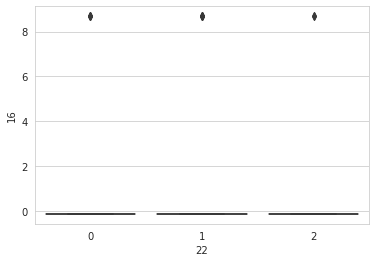

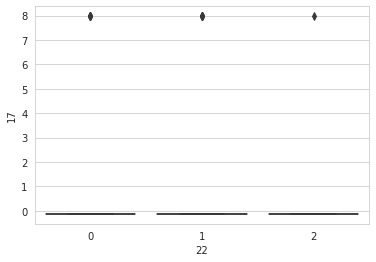

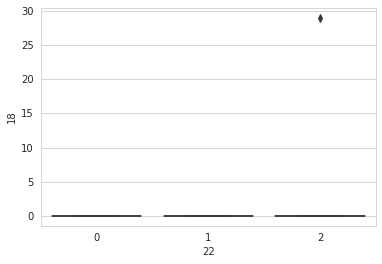

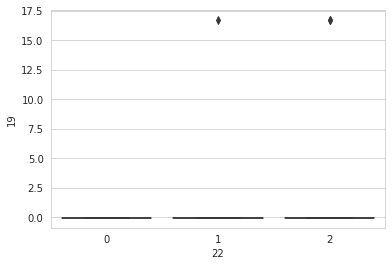

<Figure size 432x288 with 0 Axes>

In [554]:
l=list(std_data.columns[0:20])
for i in range(len(l)-1):
    sns.boxplot(x='22',y=l[i], data=std_data, palette='winter')
    plt.figure()

In [555]:
std_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       840 non-null    float64
 1   2       840 non-null    float64
 2   3       840 non-null    float64
 3   4       840 non-null    float64
 4   5       840 non-null    float64
 5   6       840 non-null    float64
 6   7       840 non-null    float64
 7   8       840 non-null    float64
 8   9       840 non-null    float64
 9   10      840 non-null    float64
 10  11      840 non-null    float64
 11  12      840 non-null    float64
 12  13      840 non-null    float64
 13  14      840 non-null    float64
 14  15      840 non-null    float64
 15  16      840 non-null    float64
 16  17      840 non-null    float64
 17  18      840 non-null    float64
 18  19      840 non-null    float64
 19  20      840 non-null    float64
 20  21      840 non-null    float64
 21  22      840 non-null    int64  
dtypes:

Text(0.5, 1.0, 'Dengan Profesi')

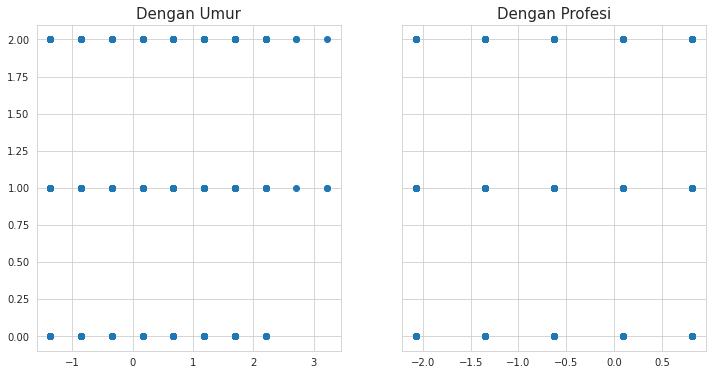

In [556]:
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
ax1.scatter(std_data['2'],std_data['22'])
ax1.set_title("Dengan Umur", fontsize=15)
ax2.scatter(std_data['3'],std_data['22'])
ax2.set_title("Dengan Profesi", fontsize=15)

Text(0.5, 1.0, 'Waktu gejala: < 24 jam')

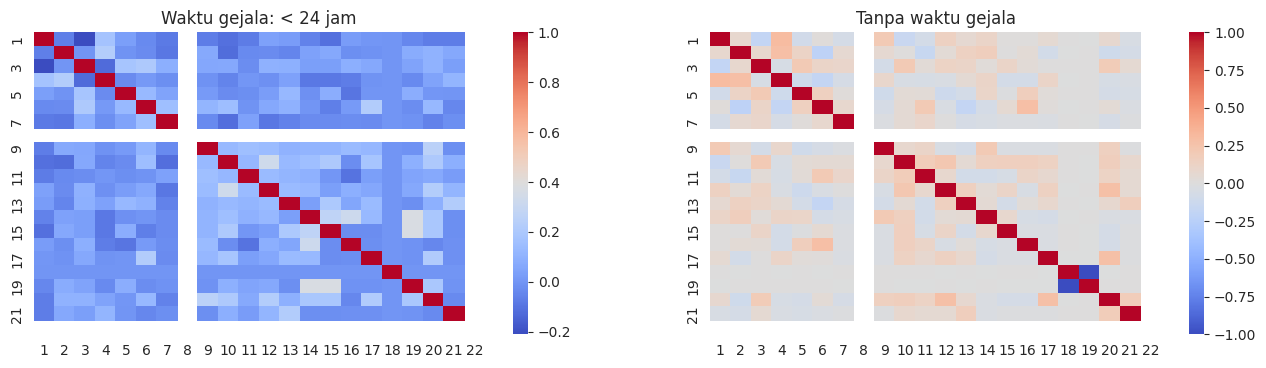

In [557]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['22']==0][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Tanpa waktu gejala')
ax = sns.heatmap(std_data[std_data['22']==1][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: < 24 jam')

Text(0.5, 1.0, 'Waktu gejala: lebih dari 72 jam')

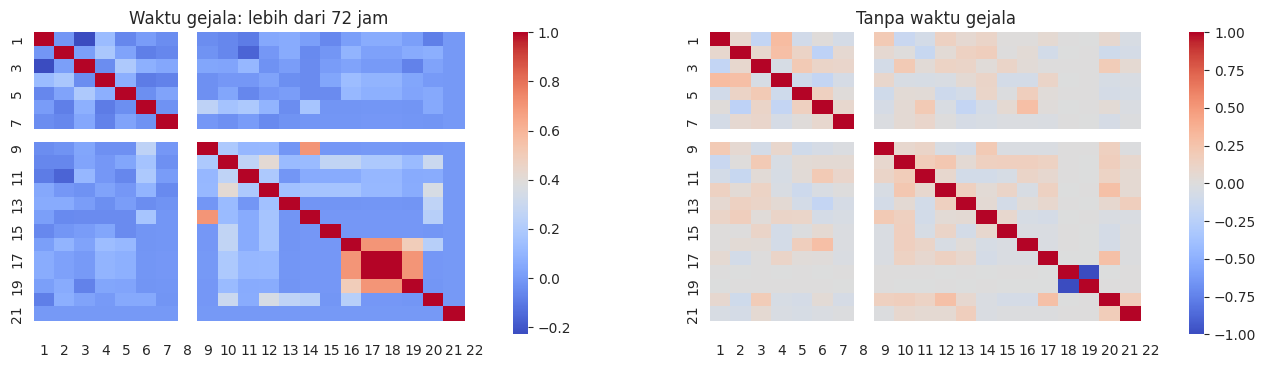

In [558]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['22']==0][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Tanpa waktu gejala')
ax = sns.heatmap(std_data[std_data['22']==2][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: lebih dari 72 jam')

Text(0.5, 1.0, 'Waktu gejala: > 72 jam')

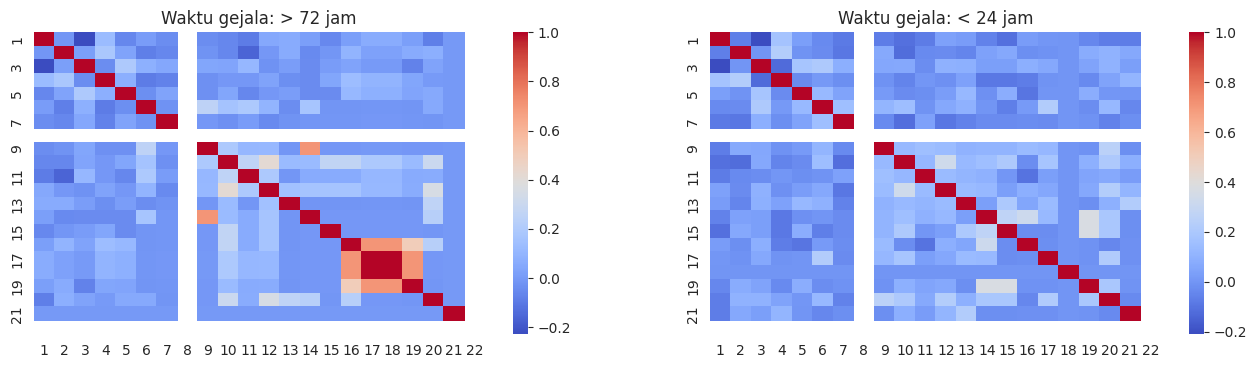

In [559]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['22']==1][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Waktu gejala: < 24 jam')
ax = sns.heatmap(std_data[std_data['22']==2][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: > 72 jam')

In [560]:
std_data = std_data.drop(['8'], axis = 1)
std_data = std_data.drop(['4'], axis = 1)
std_data = std_data.drop(['5'], axis = 1)
std_data = std_data.drop(['3'], axis = 1)
std_data = std_data.drop(['1'], axis = 1)
#std_data = std_data.drop(['12. Joint Pain'], axis = 1)
#std_data = std_data.drop(['13. Fainted'], axis = 1)

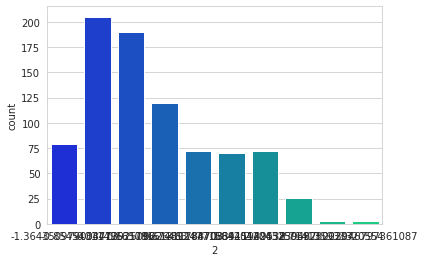

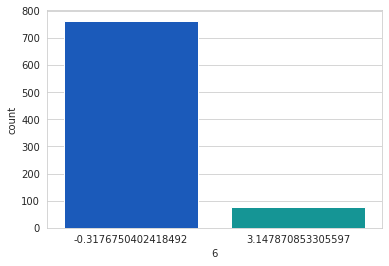

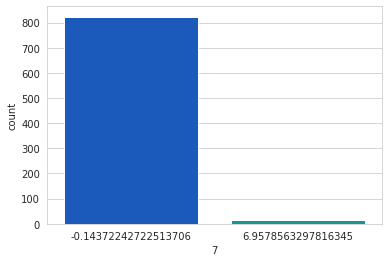

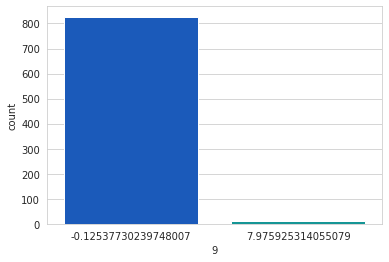

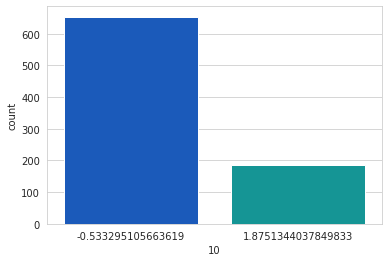

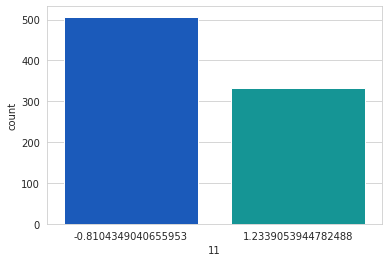

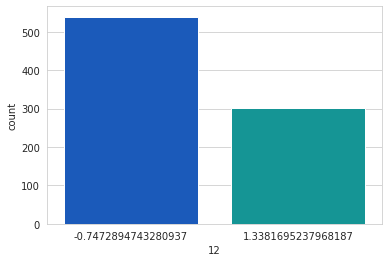

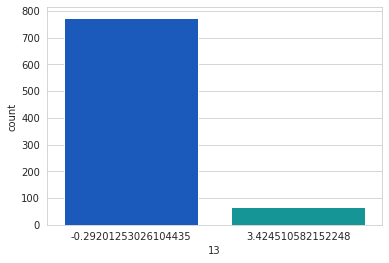

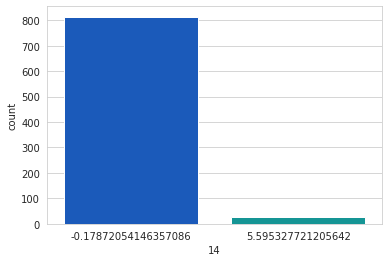

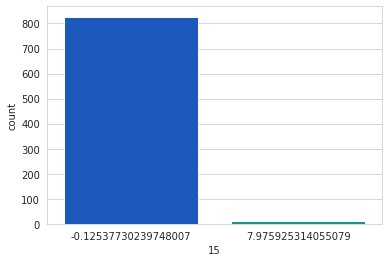

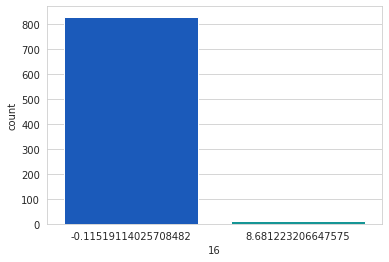

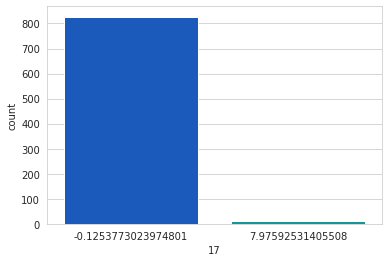

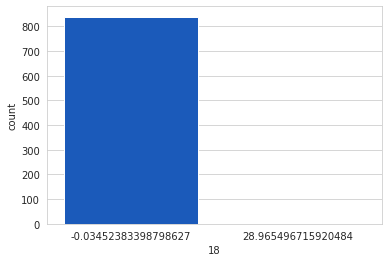

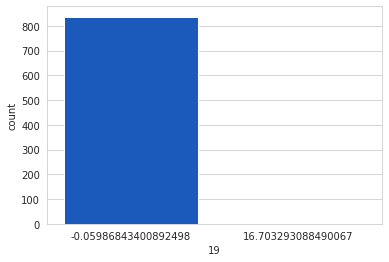

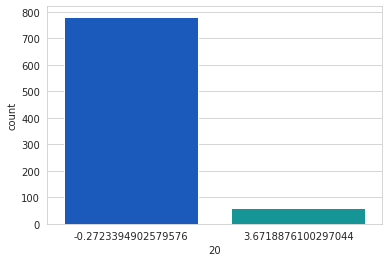

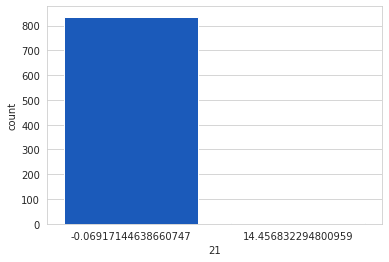

<Figure size 432x288 with 0 Axes>

In [561]:
l=list(std_data.columns[0:22])
for i in range(len(l)-1):
    sns.countplot(x=l[i], data=std_data, palette='winter')
    plt.figure()

Hapus kolom yang diperkirakan tidak mempengaruhi klasifikasi dilihat dari korelasi

Text(0.5, 1.0, 'Waktu gejala: < 24 jam')

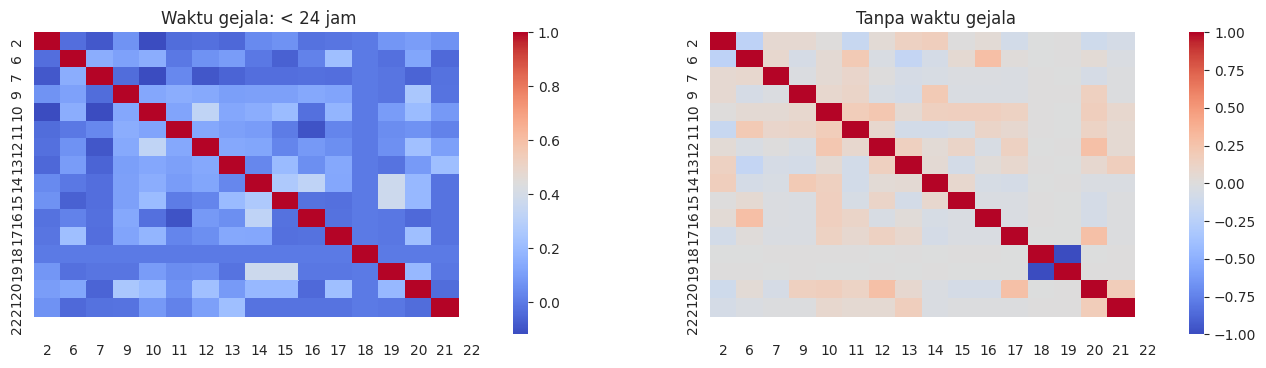

In [562]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['22']==0][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Tanpa waktu gejala')
ax = sns.heatmap(std_data[std_data['22']==1][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: < 24 jam')


Text(0.5, 1.0, 'Waktu gejala: lebih dari 24 jam')

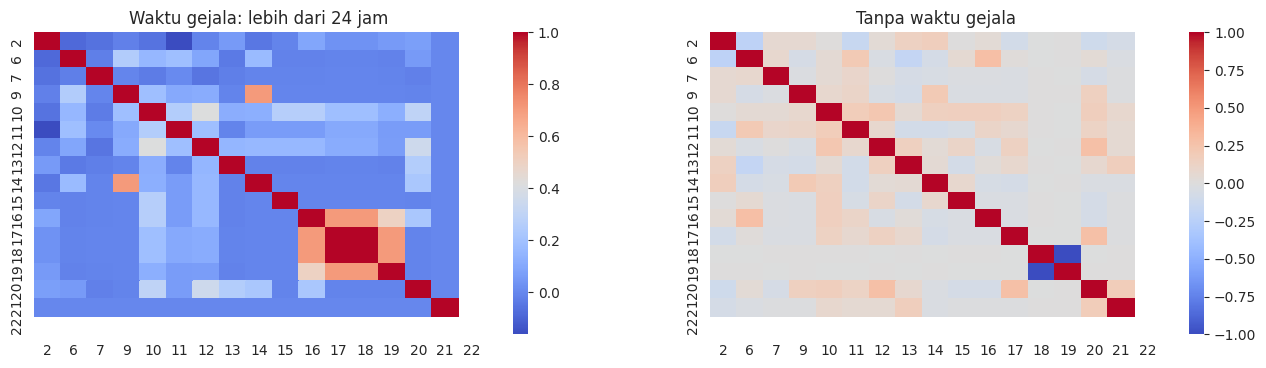

In [563]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['22']==0][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Tanpa waktu gejala')
ax = sns.heatmap(std_data[std_data['22']==2][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: lebih dari 24 jam')

Text(0.5, 1.0, 'Waktu gejala: > 72 jam')

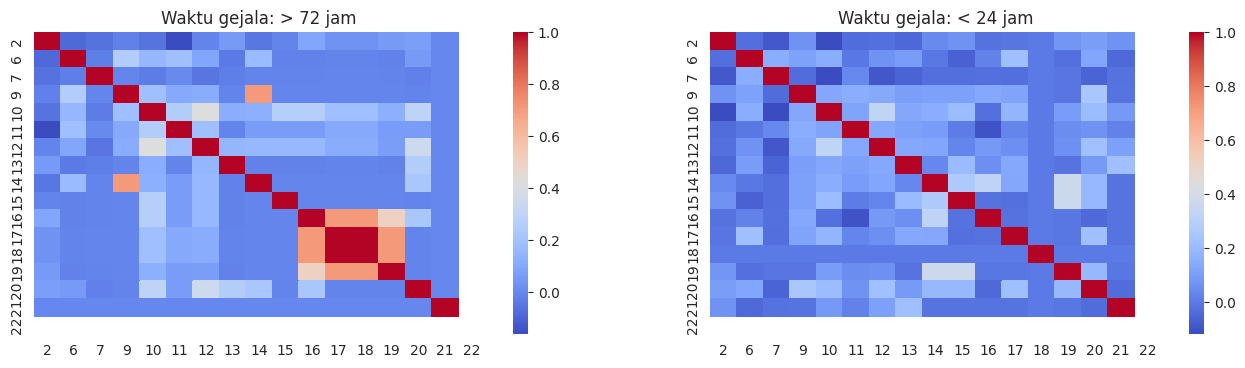

In [564]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data[std_data['22']==1][std_data.columns].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Waktu gejala: < 24 jam')
ax = sns.heatmap(std_data[std_data['22']==2][std_data.columns].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Waktu gejala: > 72 jam')

# Membangun Model

In [565]:
from sklearn import model_selection

In [566]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(std_data.drop(columns=['22']), std_data[['22']], test_size=0.33, random_state=69)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

#X_train = std_data.drop(std_data.columns[0], axis=1)
#y_train = std_data.drop(std_data.columns[1:11], axis=1)
#X_test = std_data_test

Jumlah Training Data :  562  | Jumlah Test Data :  278


## K-Nearest Neighbor

In [567]:
from sklearn.metrics import confusion_matrix

In [568]:
modelKnn = neighbors.KNeighborsClassifier(n_neighbors=3)

print(X_train)
print(y_train)

modelKnn.fit(X_train, y_train)

y_predKnn = modelKnn.predict(X_test)
print(y_predKnn)

            2         6         7  ...        19        20        21
732 -0.854540 -0.317675 -0.143722  ... -0.059868 -0.272339 -0.069171
191 -0.344729 -0.317675 -0.143722  ... -0.059868 -0.272339 -0.069171
586 -0.344729 -0.317675 -0.143722  ... -0.059868 -0.272339 -0.069171
319 -0.344729 -0.317675 -0.143722  ... -0.059868 -0.272339 -0.069171
414  0.165082 -0.317675 -0.143722  ... -0.059868 -0.272339 -0.069171
..        ...       ...       ...  ...       ...       ...       ...
439 -0.854540 -0.317675 -0.143722  ... -0.059868  3.671888 -0.069171
602 -0.344729 -0.317675 -0.143722  ... -0.059868 -0.272339 -0.069171
619 -0.854540  3.147871 -0.143722  ... -0.059868 -0.272339 -0.069171
203  1.694514 -0.317675 -0.143722  ... -0.059868 -0.272339 -0.069171
54  -1.364351  3.147871  6.957856  ... -0.059868 -0.272339 -0.069171

[562 rows x 16 columns]
     22
732   2
191   2
586   2
319   2
414   2
..   ..
439   0
602   2
619   1
203   2
54    1

[562 rows x 1 columns]
[1 1 1 2 2 1 0 1 0 0 1 1 1 

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


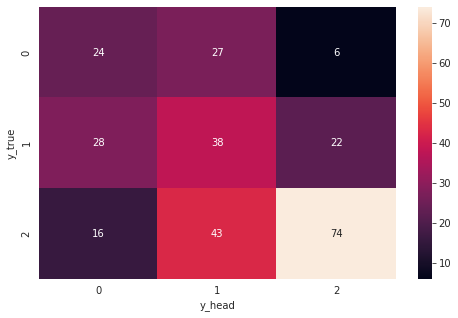

In [569]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predKnn)

import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predKnn), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [570]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predKnn))

              precision    recall  f1-score   support

           0       0.35      0.42      0.38        57
           1       0.35      0.43      0.39        88
           2       0.73      0.56      0.63       133

    accuracy                           0.49       278
   macro avg       0.48      0.47      0.47       278
weighted avg       0.53      0.49      0.50       278



Melakukan Cross Validation

In [571]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = neighbors.KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.56637168 0.57522124 0.49107143 0.46428571 0.47321429]
cv_scores mean:0.5140328697850822


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [572]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters untuk melakukan tuning
n_neighbors = list(range(1,100))
p = [1,2]
weights = ['uniform', 'distance']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p, weights=weights)

#Making model
clf = GridSearchCV(modelKnn, hyperparameters, cv=10)
best_model = clf.fit(X_train, y_train)

#Best Hyperparameters Value
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', best_model.best_estimator_.get_params()['weights'])

#Predict testing set
predicted2 = best_model.predict(X_test)

#Check performance using accuracy
print(accuracy_score(y_test, predicted2))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Best p: 2
Best n_neighbors: 30
Best weights: uniform
0.6115107913669064


In [573]:
best_model.score(X_test, y_test)

0.6115107913669064

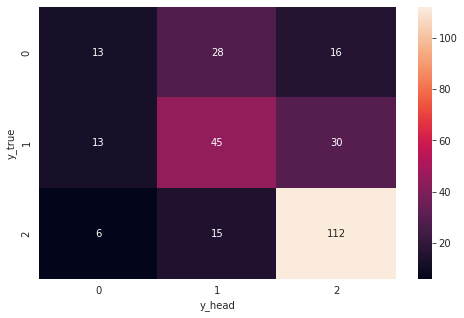

In [574]:
y_predKnnCv = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_predKnnCv, labels=best_model.classes_)

import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predKnnCv), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [575]:
print(classification_report(y_test, y_predKnnCv))

              precision    recall  f1-score   support

           0       0.41      0.23      0.29        57
           1       0.51      0.51      0.51        88
           2       0.71      0.84      0.77       133

    accuracy                           0.61       278
   macro avg       0.54      0.53      0.52       278
weighted avg       0.58      0.61      0.59       278



## Random Forest

Membangun model

In [576]:
from sklearn.ensemble import RandomForestClassifier

In [577]:
modelRf = RandomForestClassifier(random_state=0)
modelRf.fit(X_train, y_train)
modelRf.get_params()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Predict test data

In [578]:
y_predRf = modelRf.predict(X_test)
y_predRf

array([1, 1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 2,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       0, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1,
       1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1])

Membuat konfusion matrix

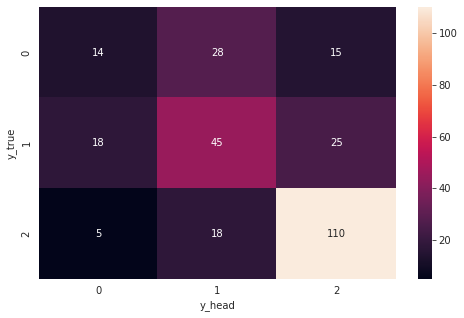

In [579]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predRf)

import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predRf), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

Akurasi dari random forest

In [580]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predRf))

              precision    recall  f1-score   support

           0       0.38      0.25      0.30        57
           1       0.49      0.51      0.50        88
           2       0.73      0.83      0.78       133

    accuracy                           0.61       278
   macro avg       0.54      0.53      0.53       278
weighted avg       0.58      0.61      0.59       278



Cross Validation

In [581]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 233, 266, 300, 333, 366, 400, 433, 466, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [582]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 14, 18, 22, 26, 30,
                                                      34, 38, 42, 46, 50,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 233, 266, 300,
                                                         333, 366, 400, 433,
                                                         466, 500]},
                   random_state=42, verbose=2)

In [583]:
rf_random.best_score_

0.5907289414798802

In [584]:
y_predRfCv = rf_random.predict(X_test)

Membuat konfusion matrix

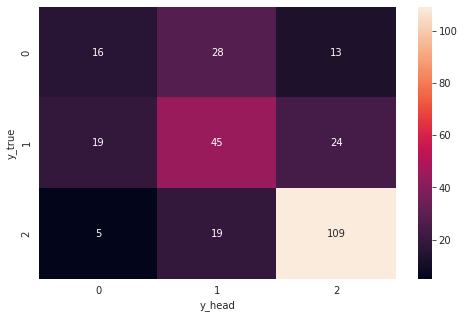

In [585]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predRfCv)

import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predRfCv), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

Akurasi dari random forest

In [586]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predRfCv))

              precision    recall  f1-score   support

           0       0.40      0.28      0.33        57
           1       0.49      0.51      0.50        88
           2       0.75      0.82      0.78       133

    accuracy                           0.61       278
   macro avg       0.55      0.54      0.54       278
weighted avg       0.59      0.61      0.60       278



## SVM

Membuat Model

In [587]:
from sklearn.svm import SVC

In [588]:
modelSvm = SVC(random_state=0)
modelSvm.fit(X_train,y_train)

y_predSvm = modelSvm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


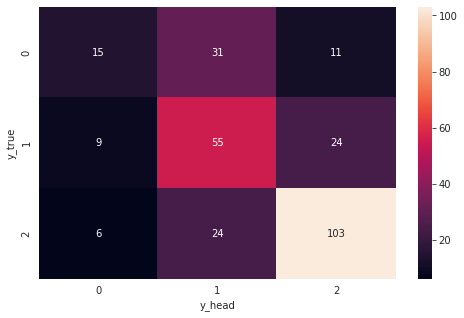

In [589]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predSvm)

import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predSvm), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [590]:
print(classification_report(y_test,y_predSvm))

              precision    recall  f1-score   support

           0       0.50      0.26      0.34        57
           1       0.50      0.62      0.56        88
           2       0.75      0.77      0.76       133

    accuracy                           0.62       278
   macro avg       0.58      0.55      0.55       278
weighted avg       0.62      0.62      0.61       278



In [591]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear','polynomial','sigmoid']}

In [592]:
from sklearn.model_selection import GridSearchCV

In [593]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

In [594]:
# Proses ini bisa memakan waktu yang lama, tergantung dari ukuran data dan banyaknya kombinasi parameter model
grid.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'polynomial', 'sigmoid']},
             verbose=1)

In [595]:
y_predSvmCv = grid.predict(X_test)


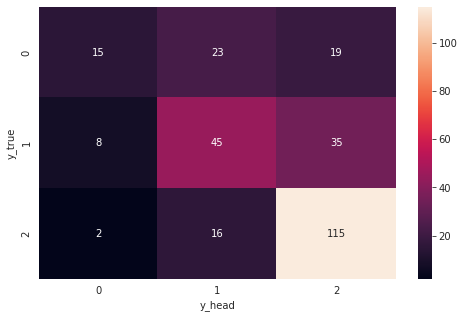

In [596]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predSvmCv)

import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predSvmCv), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [597]:
print(classification_report(y_test,y_predSvmCv))

              precision    recall  f1-score   support

           0       0.60      0.26      0.37        57
           1       0.54      0.51      0.52        88
           2       0.68      0.86      0.76       133

    accuracy                           0.63       278
   macro avg       0.61      0.55      0.55       278
weighted avg       0.62      0.63      0.61       278

